In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nba-enhanced-stats/2016-17_officialBoxScore.csv
/kaggle/input/nba-enhanced-stats/2017-18_officialBoxScore.csv
/kaggle/input/nba-enhanced-stats/2017-18_playerBoxScore.csv
/kaggle/input/nba-enhanced-stats/metadata_teamBoxScore.pdf
/kaggle/input/nba-enhanced-stats/2016-17_standings.csv
/kaggle/input/nba-enhanced-stats/2017-18_teamBoxScore.csv
/kaggle/input/nba-enhanced-stats/metadata_playerBoxScore.pdf
/kaggle/input/nba-enhanced-stats/2012-18_officialBoxScore.csv
/kaggle/input/nba-enhanced-stats/metadata_officialBoxScore.pdf
/kaggle/input/nba-enhanced-stats/2012-18_playerBoxScore.csv
/kaggle/input/nba-enhanced-stats/metadata_standing.pdf
/kaggle/input/nba-enhanced-stats/2012-18_standings.csv
/kaggle/input/nba-enhanced-stats/2016-17_teamBoxScore.csv
/kaggle/input/nba-enhanced-stats/2016-17_playerBoxScore.csv
/kaggle/input/nba-enhanced-stats/teamBoxScore.csv
/kaggle/input/nba-enhanced-stats/2012-18_teamBoxScore.csv
/kaggle/input/nba-enhanced-stats/2017-18_standings.csv


In [2]:
# Importing all the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

In [3]:
df = pd.read_csv('../input/nba-enhanced-stats/2016-17_teamBoxScore.csv')
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


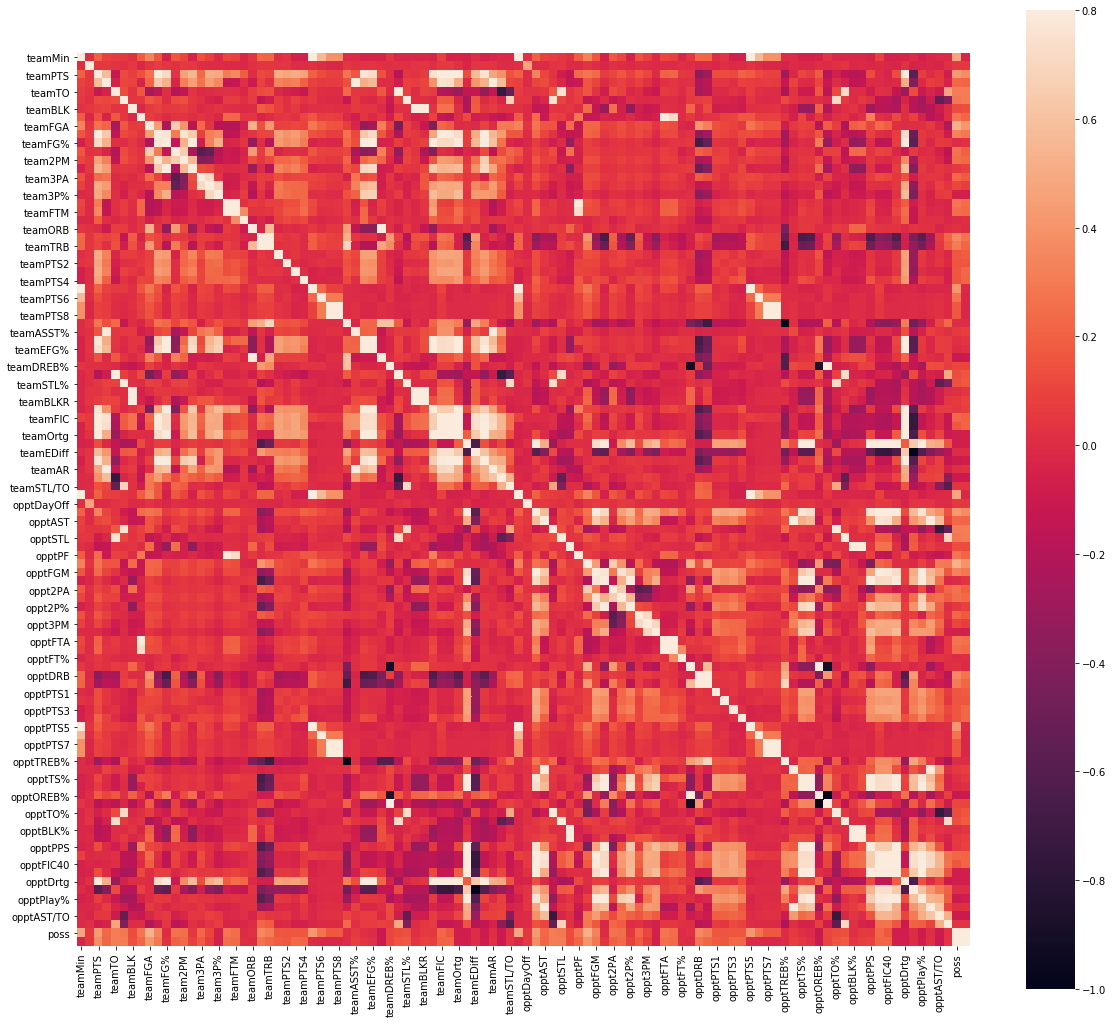

In [4]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(corrmat, vmax=.8, square=True)

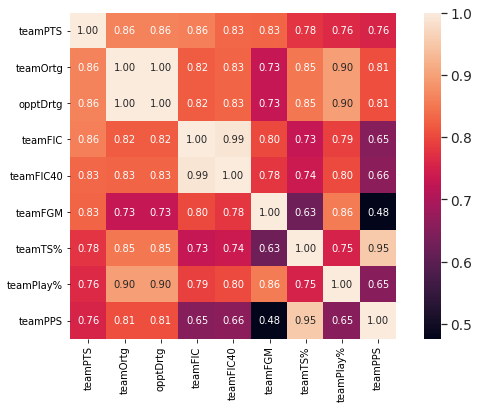

In [5]:
#team result

k = 9
cols = corrmat.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

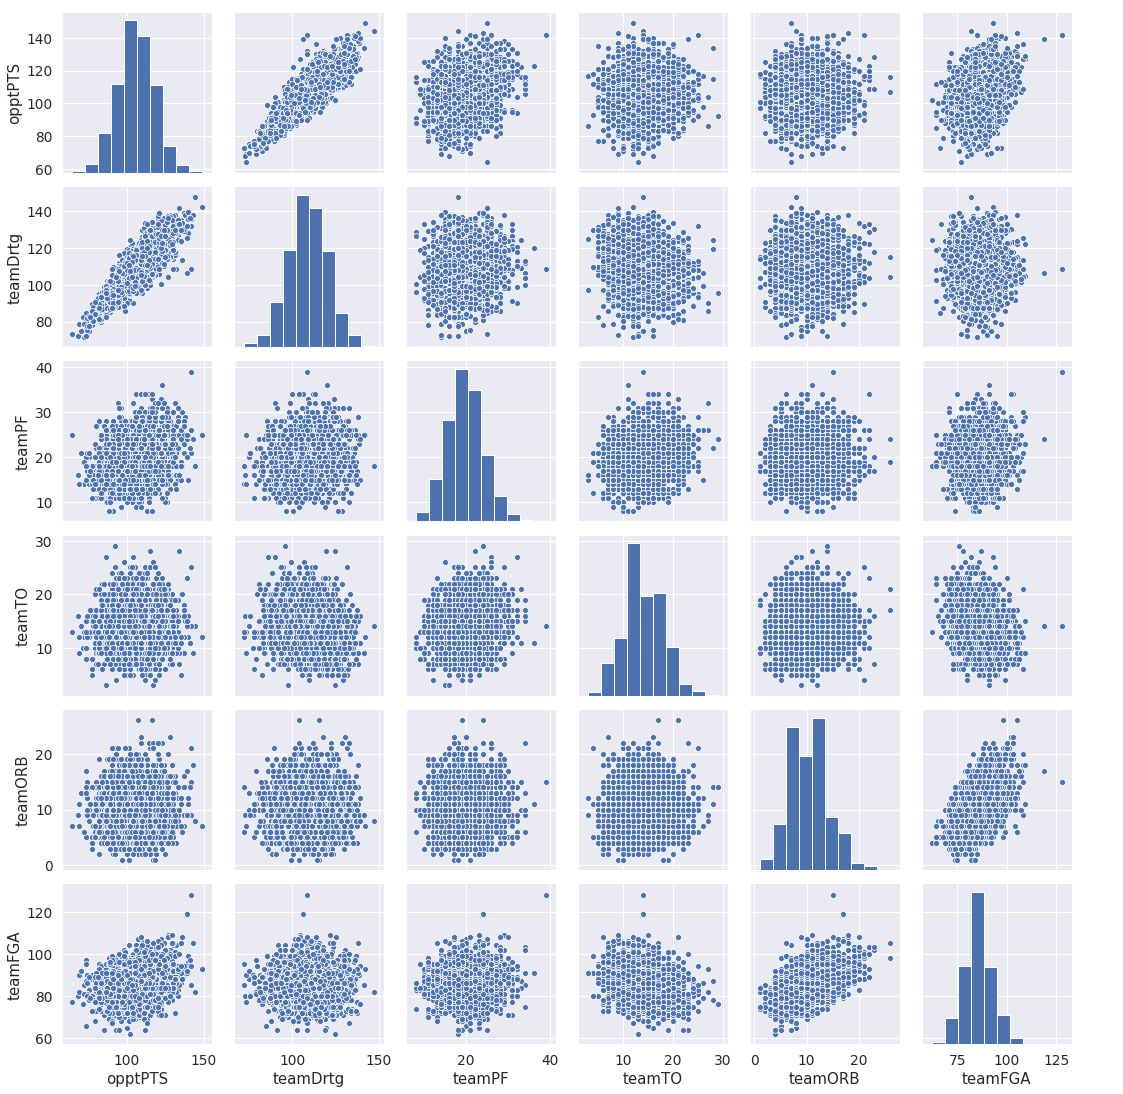

In [6]:
#scatter plots

cols1 = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA']
sns.pairplot(df[cols1], size=2.5)
plt.show()

In [7]:
#prepare x and y

feature_cols = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA']
x = df[feature_cols]
y = df['teamRslt']
x.head()

,opptPTS,teamDrtg,teamPF,teamTO,teamORB,teamFGA
0,117,116.5653,22,18,13,87
1,88,87.6731,22,15,11,94
2,113,122.1120,19,14,6,82
3,104,112.3863,18,13,5,75
4,100,101.2387,19,14,21,98


In [8]:
#train test split, standardize data

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

In [9]:
#knn 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(knn.predict_proba(x_test))
print("Accuracy : ", metrics.accuracy_score(y_test, pred))

[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 ...
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]]
Accuracy :  0.6991869918699187


In [10]:
#linear svm

clf = LinearSVC(random_state=2)
clf.fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)
pred = (clf.predict(x_test))
#print(pred)
print("Accuracy : ", metrics.accuracy_score(y_test, pred))

[[-0.02528708 -0.00231133  0.01035633  0.00453844 -0.03806414  0.03630926]]
[0.59635874]
Accuracy :  0.5264227642276422


In [11]:
#random forrest classifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
print(clf.feature_importances_)
pred = clf.predict(x_test)
#print(pred)
#print(clf.predict_proba(x_test))
print("Accuracy : ", metrics.accuracy_score(y_test, pred))

[0.2117928  0.33618507 0.11290608 0.11838343 0.10310632 0.1176263 ]
Accuracy :  0.7225609756097561


In [12]:
# Gradient Treee Boosting

clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
print("Accuracy : ", clfgtb.score(x_test, y_test))

Accuracy :  0.75
